In [84]:
import pandas as pd
data_news=pd.read_csv("./task1/data/raw_analyst_ratings.csv")
data_aapl=pd.read_csv("./task2/yfinance_data/AAPL_historical_data.csv")
data_news.head()
data_aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [5]:
data_news.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


Date Alignment

In [68]:
data_aapl.columns = data_aapl.columns.str.strip()
data_news.columns = data_news.columns.str.strip()


In [86]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [87]:
SIA=SentimentIntensityAnalyzer()
data_news['sentiment'] = data_news['headline'].apply(lambda x: SIA.polarity_scores(text=x)['compound'])

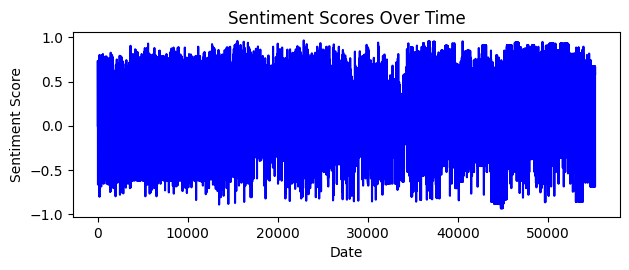

In [125]:

plt.subplot(2, 1, 1)
sns.lineplot(data=data_news_aapl, x=data_news_aapl.index, y='sentiment', color='blue')
plt.title('Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')



plt.tight_layout()
plt.show()

In [89]:
data_news["sentiment_cata"]=pd.cut(data_news["sentiment"], bins=[ -1,-0.5,-0.0001,0.5,1], labels=["very negative", "negative", "nutral","postive"])
data_news["sentiment_cata"].value_counts()

sentiment_cata
nutral           1070915
negative          182864
postive           109718
very negative      43831
Name: count, dtype: int64

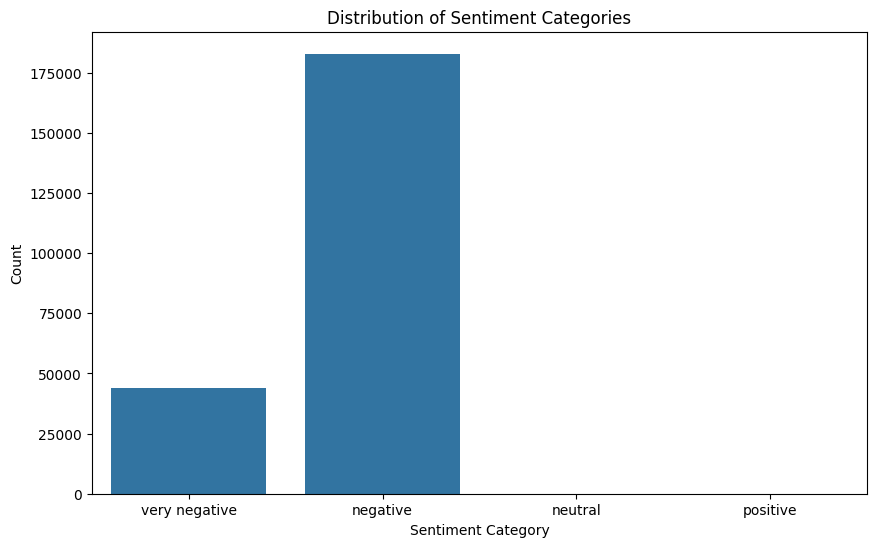

In [123]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment_cata', data=data_news, order=["very negative", "negative", "neutral", "positive"])
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Categories')
plt.show()

In [90]:
data_aapl['Date'] = pd.to_datetime(data_aapl['Date'], errors='coerce')
data_news["Date"]=pd.to_datetime(data_news["date"],errors='coerce' )


data_news['Date'] = data_news['Date'].dt.strftime('%Y-%m-%d')
data_news["Date"]=pd.to_datetime(data_news["Date"],errors='coerce' )
print(data_aapl['Date'].dtype)
print(data_news['Date'].dtype)

datetime64[ns]
datetime64[ns]


In [102]:
data_aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Daily_Return
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,-5.217061
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,-7.339788
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,2.475091
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,2.899246


In [80]:
data_news.head()

,Unnamed: 0,headline,url,publisher,date,stock,Date
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020-05-22


In [91]:
data_news_aapl = pd.merge(data_aapl, data_news, on='Date', how='inner')

In [110]:
data_news_aapl.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Unnamed: 0,headline,url,publisher,date,stock,sentiment,sentiment_cata
0,2011-04-27,12.580000,12.583929,12.396429,12.505357,10.560461,356213200,0.0,0.0,357064,"ETFs To Watch April 28, 2011 (DGP, IEO, PRN, IDX)",https://www.benzinga.com/etfs/bond-etfs/11/04/...,ETF Professor,2011-04-27 21:01:48-04:00,DGP,0.0000,nutral
1,2011-04-28,12.363929,12.491071,12.340000,12.383929,10.457921,360959200,0.0,0.0,350150,Dejour Extends Credit Facility to October 31st...,https://www.benzinga.com/news/11/04/1041764/de...,Theo Kratz,2011-04-28 15:00:36-04:00,DEJ,0.2500,nutral
2,2011-04-28,12.363929,12.491071,12.340000,12.383929,10.457921,360959200,0.0,0.0,437774,A New Regional Emerging Markets ETF,https://www.benzinga.com/etfs/emerging-market-...,Sam Subramanian,2011-04-28 13:49:29-04:00,ESR,0.0000,nutral
3,2011-04-29,12.385000,12.641071,12.381071,12.504643,10.559862,1006345200,0.0,0.0,49280,"ETF Showdown: Crouching Tigers, Hidden ETFs",https://www.benzinga.com/etfs/emerging-market-...,ETF Professor,2011-04-29 13:47:06-04:00,AIA,0.0000,nutral
4,2011-04-29,12.385000,12.641071,12.381071,12.504643,10.559862,1006345200,0.0,0.0,539428,The GDL Fund to Redeem Its Outstanding 8.50% S...,https://www.benzinga.com/news/11/04/1045464/th...,Benzinga Staff,2011-04-29 16:11:05-04:00,GDL,0.7351,postive
5,2011-05-02,12.490714,12.516786,12.339286,12.367143,10.443746,442713600,0.0,0.0,46024,ETF Securities Reportedly Mulling IPO,https://www.benzinga.com/etfs/commodity-etfs/1...,ETF Professor,2011-05-02 03:24:46-04:00,AGOL,0.2960,nutral
6,2011-05-02,12.490714,12.516786,12.339286,12.367143,10.443746,442713600,0.0,0.0,341542,Play bin Laden's Capture With These ETFs,https://www.benzinga.com/etfs/commodity-etfs/1...,ETF Professor,2011-05-02 02:17:31-04:00,DBP,0.3400,nutral
7,2011-05-02,12.490714,12.516786,12.339286,12.367143,10.443746,442713600,0.0,0.0,358047,"Five Stocks For The End Of QE2 (DGZ, SZO, PSQ,...",https://www.benzinga.com/trading-ideas/long-id...,Gary Cassady,2011-05-02 17:12:39-04:00,DGZ,0.0000,nutral
8,2011-05-02,12.490714,12.516786,12.339286,12.367143,10.443746,442713600,0.0,0.0,558621,ETF Securities Reportedly Mulling IPO,https://www.benzinga.com/etfs/commodity-etfs/1...,ETF Professor,2011-05-02 03:24:46-04:00,GLTR,0.2960,nutral
9,2011-05-02,12.490714,12.516786,12.339286,12.367143,10.443746,442713600,0.0,0.0,1038694,"Five Stocks For The End Of QE2 (DGZ, SZO, PSQ,...",https://www.benzinga.com/trading-ideas/long-id...,Gary Cassady,2011-05-02 17:12:39-04:00,PSQ,0.0000,nutral


In [95]:
data_aapl['Daily_Return'] = data_aapl['Close'].pct_change() * 100

print(data_aapl)


            Date        Open        High         Low       Close   Adj Close  \
0     1980-12-12    0.128348    0.128906    0.128348    0.128348    0.098943   
1     1980-12-15    0.122210    0.122210    0.121652    0.121652    0.093781   
2     1980-12-16    0.113281    0.113281    0.112723    0.112723    0.086898   
3     1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089049   
4     1980-12-18    0.118862    0.119420    0.118862    0.118862    0.091630   
...          ...         ...         ...         ...         ...         ...   
10993 2024-07-24  224.000000  224.800003  217.130005  218.539993  218.287323   
10994 2024-07-25  218.929993  220.850006  214.619995  217.490005  217.238556   
10995 2024-07-26  218.699997  219.490005  216.009995  217.960007  217.708008   
10996 2024-07-29  216.960007  219.300003  215.750000  218.240005  217.987686   
10997 2024-07-30  219.190002  220.330002  216.119995  218.800003  218.547043   

          Volume  Dividends  Stock Spli

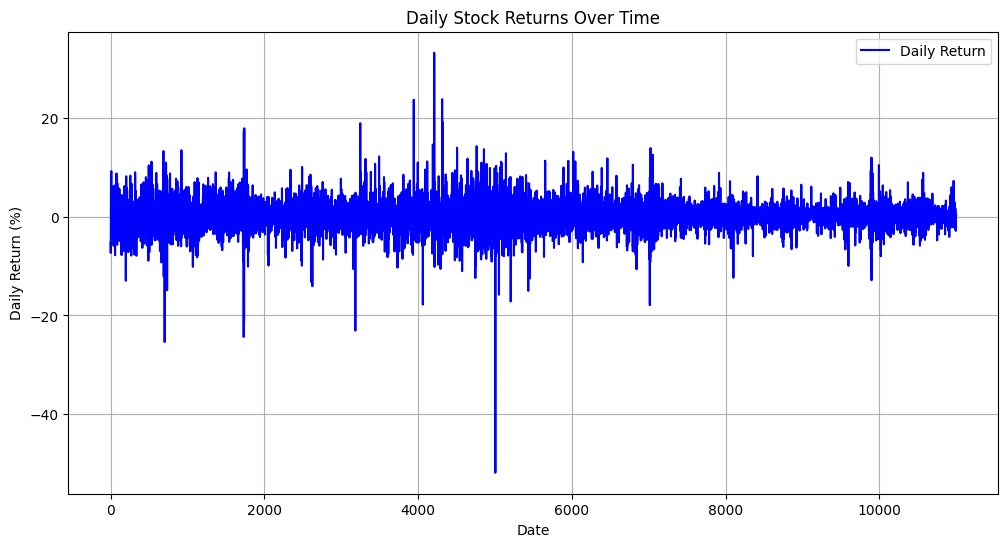

In [122]:
plt.figure(figsize=(12, 6))
plt.plot(data_aapl.index, data_aapl['Daily_Return'], label='Daily Return', color='blue')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.title('Daily Stock Returns Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [113]:
data_news_aapl['Daily_Return'] = pd.to_numeric(data_aapl['Daily_Return'], errors='coerce')

In [114]:
data_news_aapl['Daily_Return'] = pd.to_numeric(data_news_aapl['Daily_Return'], errors='coerce')

correlation = data_news_aapl[['sentiment', 'Daily_Return']].corr().iloc[0, 1]
print(f'Correlation between sentiment score and stock returns: {correlation}')

Correlation between sentiment score and stock returns: -0.016552256772549345


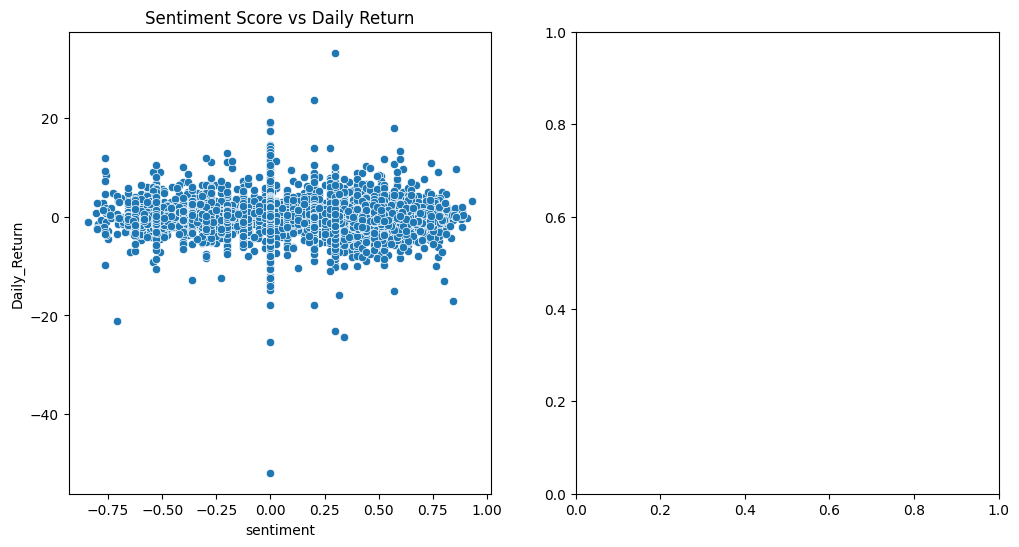

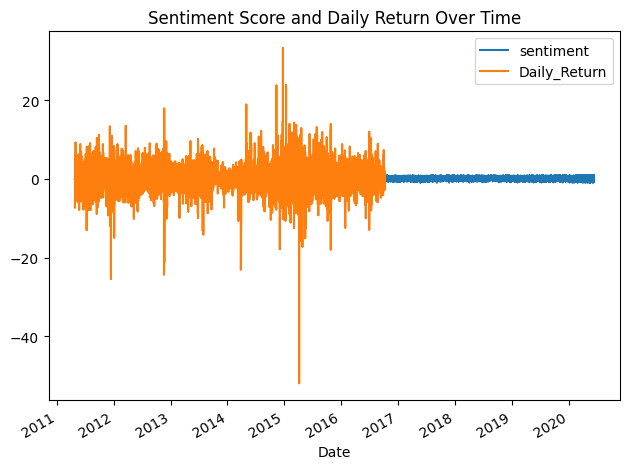

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='sentiment', y='Daily_Return', data=data_news_aapl)
plt.title('Sentiment Score vs Daily Return')
plt.subplot(1, 2, 2)
data_news_aapl.set_index('Date')[['sentiment', 'Daily_Return']].plot()
plt.title('Sentiment Score and Daily Return Over Time')

plt.tight_layout()
plt.show()

In [119]:
print(data_news_aapl[['sentiment', 'Daily_Return']].isnull().sum())

sentiment           0
Daily_Return    44233
dtype: int64
